<h3 style="background-color: #F7F7F7; color: blue; padding: 10px;">
    2d AttId Grid Plots
</h3>


In [1]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
import os
from hom import compute_cube_labels, plot_hom, write_cube_labels

In [2]:
system = 1                  # [1,2,3,4,5,6,7,8,10,11]
num_of_pts = 100            # [10, 100, 1000, 10000]
num_points_per_dim = 101      # User Choice

In [3]:
path = f'../data2/system{system}/'
path_out = path + str(num_points_per_dim) + 'gppd/'

isExist = os.path.exists(path)
if not(isExist):
    print('The data for this system / number of points does not exist. Run make_data.py to create data.')
else:
    with open(path + 'exp_info.pickle', 'rb') as handle:
        exp_info = pickle.load(handle)
    domain = exp_info['domain']
    print(exp_info)
    print('Number of Boxes = ', (num_points_per_dim-1)**exp_info['dim'])

{'system': 1, 'num_of_pts': 100, 'domain': ((-2, 2), (-3.5, 3.5)), 'dim': 2, 'step_size': 1, 'eps': 0.001, 'max_iter': 100, 'norm': False, 'delay': False, 'delay_iter': 20, 'resolution': 1.9, 'n_components': 2}
Number of Boxes =  10000


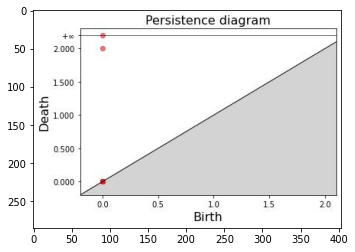

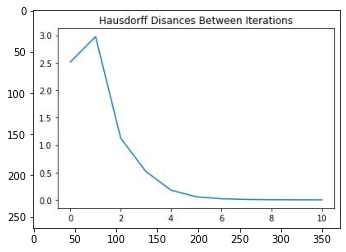

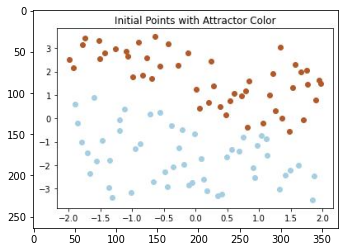

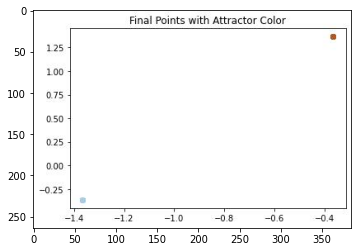

A resolution of 1.9 was used which yeilded 2 connected components in the graph


In [4]:
plt.figure()
PD_img = mpimg.imread(f'../output/figures/system{system}/' + f'PD.jpg')
imgplot = plt.imshow(PD_img)
plt.show()

plt.figure()
HD_img = mpimg.imread(f'../output/figures/system{system}/' + f'Hausdorff_Disances_Between_Iterations.jpg')
imgplot = plt.imshow(HD_img)
plt.show()

plt.figure()
IP_img = mpimg.imread(f'../output/figures/system{system}/' + f'Initial_Points_with_Attractor_Color.jpg')
imgplot = plt.imshow(IP_img)
plt.show()

plt.figure()
FP_img = mpimg.imread(f'../output/figures/system{system}/' + f'Final_Points_with_Attractor_Color.jpg')
imgplot = plt.imshow(FP_img)
plt.show()

print('A resolution of', exp_info['resolution'], 'was used which yeilded', exp_info['n_components'], 'connected components in the graph')

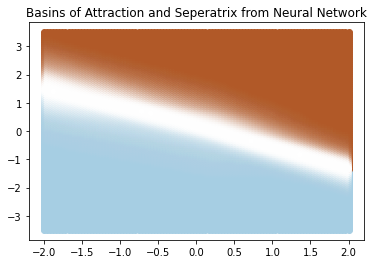

<Figure size 432x288 with 0 Axes>

In [5]:
%run analyze_data.py {system} {num_of_pts} {num_points_per_dim}

In [6]:
data_on_grid=np.loadtxt(path_out + 'data_on_grid.csv', delimiter=',')
df=pd.read_csv(path_out + 'data_on_grid.csv', delimiter=',', header=None)  
#df.describe()     

In [7]:
dim = exp_info['dim']
N = int(num_points_per_dim) 
X = [np.linspace(domain[i][0],domain[i][1],N) for i in range(dim)]

In [8]:
cube_labels = compute_cube_labels(data_on_grid, N, dim)

[5143, 4716, 0, 141]


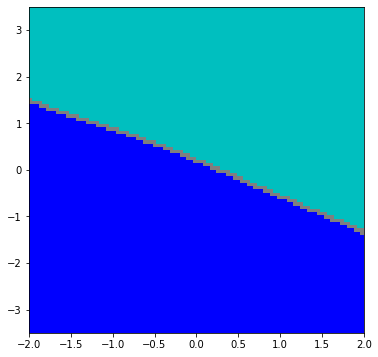

In [9]:
plot_hom(cube_labels, domain, N, X)

In [10]:
write_cube_labels(cube_labels, dim, N, path_out)

In [16]:
import pychomp2 as pychomp
import os
filenames = []
for file in os.listdir(path_out):
    if file.startswith("att") or file.startswith("sep"):
        filenames.append(os.path.join(path_out, file))

homology = []
for fname in filenames:
    with open(fname) as f:
        lines = f.readlines()
        cubes = [eval(elem) for elem in lines]
        if len(cubes) != 0:
            hom = pychomp.CubicalHomology(cubes)
        else:
            hom = None
        homology.append(hom)
homology = [i for i in homology if i is not None]

In [17]:
print(homology)
with open(path_out + 'homology.txt','w') as hom:
    hom.write(str(homology))

[[1, 0, 0], [1, 0, 0], [1, 0, 0]]
